### Answers to Assignment 1 of 230E

##### Authors(alphabetic order)
1) Ishan Pathak ishan_pathak@berkeley.edu
2) Leonid Maksymenko leo.maksymenko@berkeley.edu
3) Nymph Qiu nymph_qiu@berkeley.edu
4) Xuanzhong Ren rxz19@berkeley.edu

#### Prerequisite Packages

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader.data as web
import quandl
from scipy.stats import chi2

#### Q1

(a)<br>
$\gamma(k-1) = Cov\{\phi_1(Y_{t-1}-\mu)+\phi_2(Y_{t-2}-\mu)+\epsilon_t, Y_{t+(k-1)}\}$<br>
$\gamma(k-2) = Cov\{\phi_1(Y_{t-1}-\mu)+\phi_2(Y_{t-2}-\mu)+\epsilon_t, Y_{t+(k-2)}\}$<br>
$\gamma(k) = Cov\{\phi_1(Y_{t-1}-\mu)+\phi_2(Y_{t-2}-\mu)+\epsilon_t, Y_{t+k}\}$<br>
$\because Y_{t+k} - \mu = \phi_1(Y_{t+(k-1)} - \mu) + \phi_2(Y_{t+(k-2)} - \mu) + \epsilon_{t+k}$<br>
$\therefore \gamma(k) = Cov\{\phi_1(Y_{t-1}-\mu)+\phi_2(Y_{t-2}-\mu)+\epsilon_t, \phi_1(Y_{t+(k-1)} - \mu) + \phi_2(Y_{t+(k-2)} - \mu) + \epsilon_{t+k}\}$<br>
$\therefore \gamma(k) = \phi_1\gamma(k-1) + \phi_2\gamma(k-2)$<br>
$\therefore \rho(k)=\phi_1\rho(k-1)+\phi_2\rho(k-2)$<br>

(b)<br>
$\rho(1)=\phi_1\rho(0)+\phi_2\rho(-1)=\phi_1+\phi_2\rho(1)$<br>
$\rho(2)=\phi_1\rho(0)\rho(1)+\phi_2\rho(0)=\phi_1\rho(1)+\phi_2$<br>
$$
\begin{pmatrix}
\rho(1) \\
\rho(2) 
\end{pmatrix}=\begin{pmatrix}
1 & \rho(1) \\
\rho(1) & 1 
\end{pmatrix}\begin{pmatrix}
\phi_1 \\
\phi_2 
\end{pmatrix}
$$

(c)<br>
$$
\begin{pmatrix}
0.4 \\
0.2 
\end{pmatrix}=\begin{pmatrix}
1 & 0.4 \\
0.4 & 1 
\end{pmatrix}\begin{pmatrix}
\phi_1 \\
\phi_2 
\end{pmatrix}
$$
$
\because \begin{pmatrix}
1 & 0.4 \\
0.4 & 1 
\end{pmatrix}^{-1}=\begin{pmatrix}
\frac{1}{0.84} & \frac{-0.4}{0.84} \\
\frac{-0.4}{0.84} & \frac{1}{0.84} 
\end{pmatrix}
$<br>
$\therefore
\begin{pmatrix}
\frac{1}{0.84} & \frac{-0.4}{0.84} \\
\frac{-0.4}{0.84} & \frac{1}{0.84} 
\end{pmatrix}\begin{pmatrix}
0.4 \\
0.2 
\end{pmatrix}=\begin{pmatrix}
\phi_1 \\
\phi_2 
\end{pmatrix}=\begin{pmatrix}
\frac{8}{21} \\
\frac{1}{21}
\end{pmatrix}
$<br>
$\therefore \rho(3)=\frac{8}{21} 0.4 + \frac{1}{21} 0.2=\frac{17}{105}\approx0.162$

#### Q2

d=1 is recommended. <br>
We could observe that past effects could not die out when d=0 according to ACF graph. All lags are significant. When d=1, in the left graph, we could observe stationarity and only lag=1 matters in ACF plot, for which the process is ergodic so stationary. When d=2, it is over differencing, no improvement on ACF and more past effects impact the results.

#### Q3

Placeholder for Answers

#### Q4

Placeholder for Answers

#### Q5

$
x_t=\phi_1L x_t + \phi_2L^2 x_t + \epsilon_t
$<br>
$
x_t(1-\phi_1L-\phi_2L^2)=\epsilon_t=x_t(1-\lambda_1L)(1-\lambda_2L)
$<br>
To let the process be stationary and ergodic, $\phi_1$ and $\phi_2$ need to ensure the absolute value of roots of equation $\Phi(z)=1-\phi_1z-\phi_2z^2$ would be larger than 1<br>
##### **If real roots**<br>
$\phi_1^2 + 4\phi_2 > 0$ => $\phi_2 > -\frac{\phi_1^2}{4}$<br>
1) if $\phi_2 < 0$<br>
$\phi_1+\phi_2 < 1, \frac{\phi_1}{-2\phi_2} > 1$ or $-\phi_1+\phi_2 < 1, \frac{\phi_1}{-2\phi_2} < -1$<br>
=> $\phi_2 < 1 - \phi_1$, $\phi_2 > -\frac{\phi_1}{2}$ or $\phi_2 < 1 + \phi_1$, $\phi_2 > \frac{\phi_1}{2}$<br>
2) if $\phi_2 > 0$<br>
$\phi_1+\phi_2 < 1, -\phi_1+\phi_2 < 1$<br>
=> $\phi_2 < 1 - \phi_1$, $\phi_2 < 1 + \phi_1$
##### **If complex roots** <br>
$\phi_1^2 + 4\phi_2 < 0$ => $\phi_2 < -\frac{\phi_1^2}{4}$<br>
$-1 < \phi_2 < 0$<br>
The detailed graph is shown below. Valid real roots are entailed in green region while imaginary ones in blue.

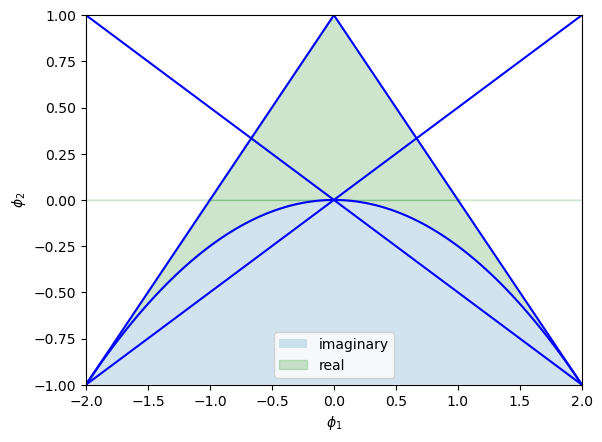

In [2]:
def f1(x):
   return -x**2/4
def f2(x):
   return 1-x
def f3(x):
   return 1+x
def f4(x):
   return -x/2
def f5(x):
   return -1
def f6(x):
   return 0
def f7(x):
   return x/2
    
def upperbound_positive_phi2(x):
    return max(min(1-x,1+x), 0)
def lowerbound_positive_phi2(x):
    return 0
        
def upperbound_negative_phi2(x):
    if x < 0:
        return min(1+x,0)
    else:
        return min(1-x,0)
def lowerbound_negative_phi2(x):
    if x < 0:
        return min(np.max([-x**2/4, x/2]), 0)
    else:
        return min(np.max([-x**2/4, -x/2]), 0)

x = np.linspace(-2, 2, 100)

plt.plot(x, f1(x), color="blue")
plt.plot(x, f2(x), color="blue")
plt.plot(x, f3(x), color="blue")
plt.plot(x, f4(x), color="blue")
plt.plot(x, f7(x), color="blue")
plt.ylim((-1,1))
plt.xlim((-2,2))
plt.xlabel(r"$\phi_1$")
plt.ylabel(r"$\phi_2$")
plt.fill_between(x, f1(x), f5(x), alpha=0.2, label="imaginary")
plt.fill_between(x, [lowerbound_positive_phi2(i) for i in x], [upperbound_positive_phi2(i) for i in x], alpha=0.2, color="green", label="real")
# plt.fill_between(x, 0, np.min([f2(x), f3(x)], axis=0), alpha=0.2, label="real", color="green")
plt.fill_between(x, [lowerbound_negative_phi2(i) for i in x], [upperbound_negative_phi2(i) for i in x], alpha=0.2, color="green")
plt.legend()
plt.show()

#### Q6

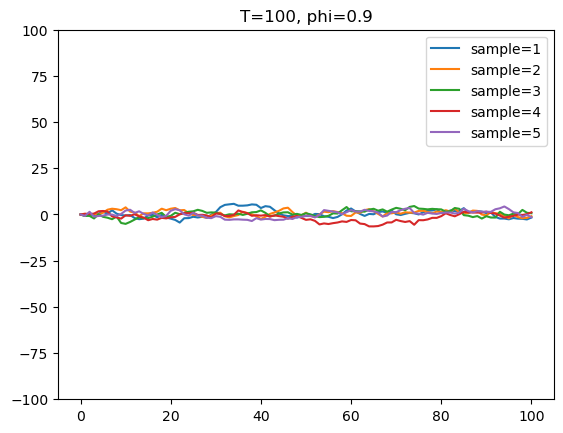

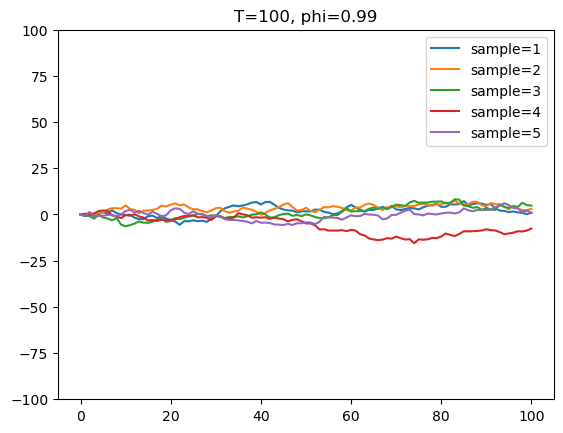

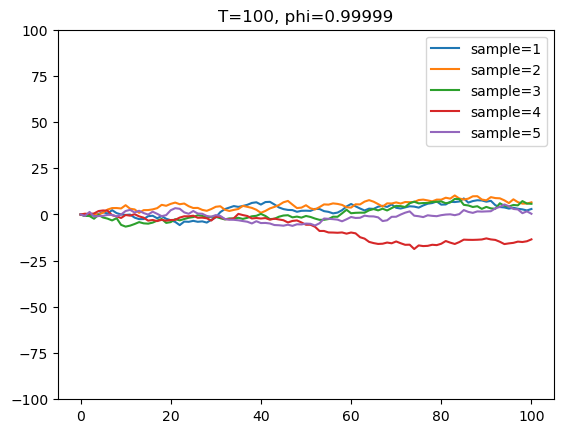

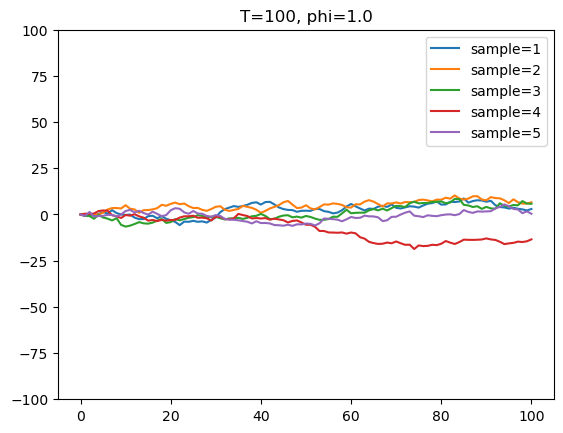

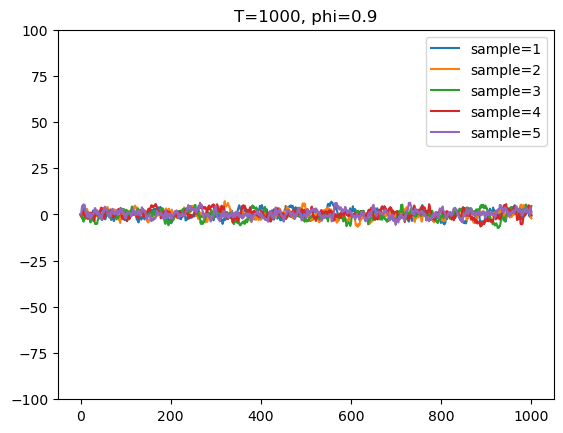

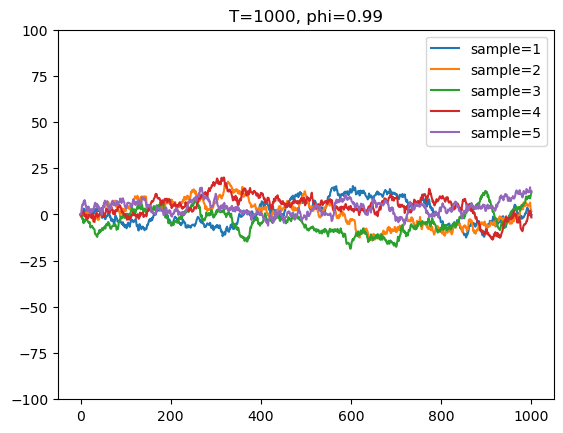

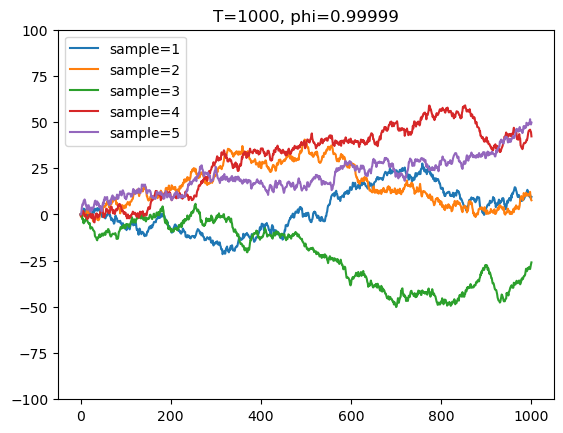

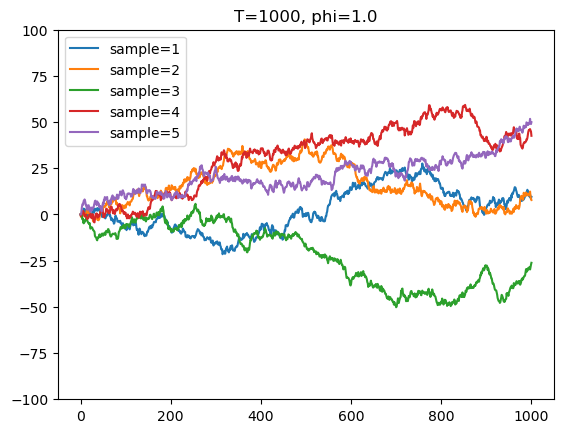

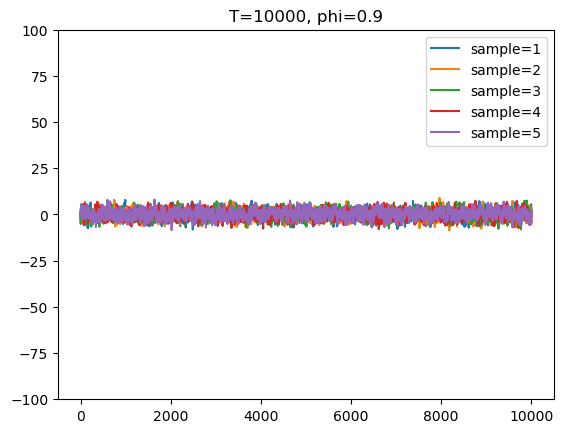

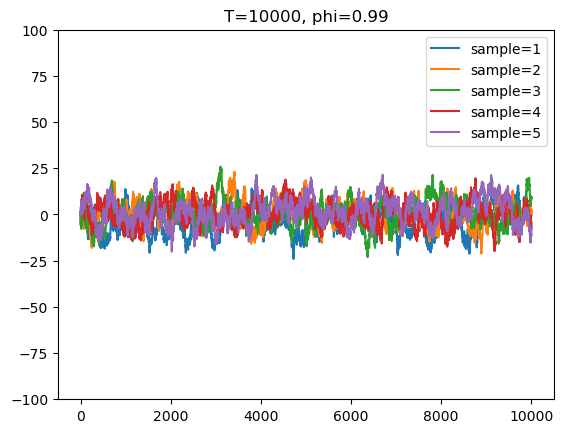

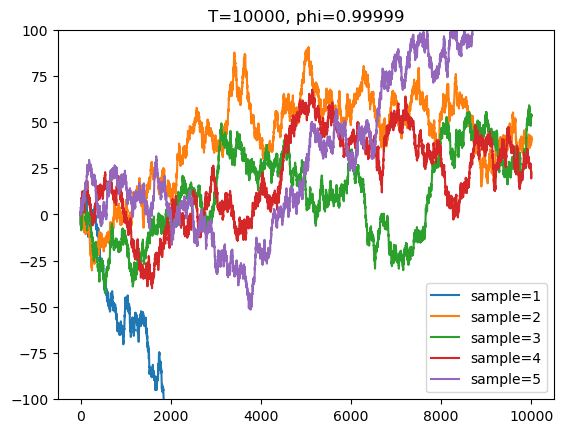

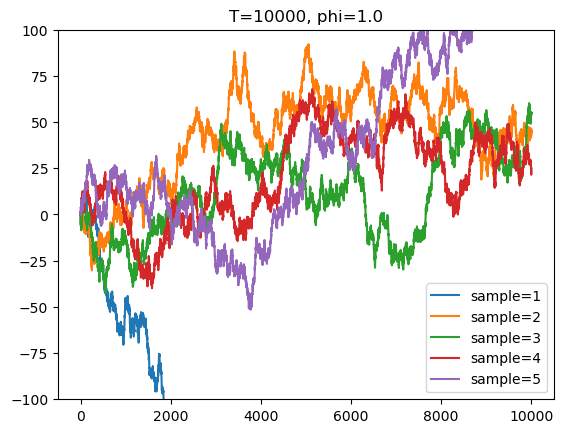

sample mean


T,100,1000,10000
phi,,,
0.90000,0.084250,0.162144,-0.013717
0.99000,0.042258,1.189117,-0.125084
0.99999,-0.070131,9.688286,-17.153182
1.00000,-0.070290,9.727245,-17.938814


sample standard deviation


T,100,1000,10000
phi,,,
0.90000,2.057870,2.201604,2.267275
0.99000,4.648133,6.659404,6.922412
0.99999,5.859882,23.051966,108.065398
1.00000,5.861425,23.129149,112.094050


population moments
population mean=0 and std=2.294157338705618
population mean=0 and std=7.088812050083353
population mean=0 and std=223.60735676962474
population mean=0 and std=infty


In [4]:
def generate_ar_1_process(T, white_noise_mu, white_noise_sigma):
    output = {}
    for num in range(5):
        paths = {str(phi): [0] for phi in [0.9,0.99,0.99999,1.0]}
        epsilons = np.random.normal(white_noise_mu, white_noise_sigma, T)
        for i in range(T):
            for phi in [0.9,0.99,0.99999,1.0]:
                paths[str(phi)].append(paths[str(phi)][-1]*phi+epsilons[i])
        output[num] = paths
    return output

def plot_sample_paths(T):
    output = generate_ar_1_process(T, 0, 1)
    for phi in [0.9,0.99,0.99999,1.0]:
        for num in range(5):
            plt.plot(output[num][str(phi)], label=f"sample={num+1}")
        plt.legend()
        plt.title(f"T={T}, phi={phi}")
        plt.ylim((-100,100))
        plt.show()
    return output
data = {"T":[], "phi":[], "mean":[], "std":[]}
for T in [100, 1000, 10000]:
    output = plot_sample_paths(T)
    for phi in [0.9,0.99,0.99999,1.0]:
        data["T"].append(T)
        data["phi"].append(phi)
        data["mean"].append(np.mean([output[num][str(phi)] for num in range(5)]))
        data["std"].append(np.std([output[num][str(phi)] for num in range(5)]))
data = pd.DataFrame(data=data) 
print("sample mean")
display(data.pivot(index="phi", columns="T", values="mean"))
print("sample standard deviation")
display(data.pivot(index="phi", columns="T", values="std"))
print("population moments")
for phi in [0.9,0.99,0.99999,1.0]:
    print(f"population mean=0 and std={np.sqrt(1/(1-phi**2)) if phi != 1 else 'infty'}")

We could observe that as $\phi$ gets closer to 1, the stationarity would worsen, as is suggested by the increasing gap between sample mean and standard deviation against population statistics. And as T increases, due to larger sample, with $\phi$ further from 1, sample moments gets closer to population, as is shown in T=10,000 case. 

#### Q7

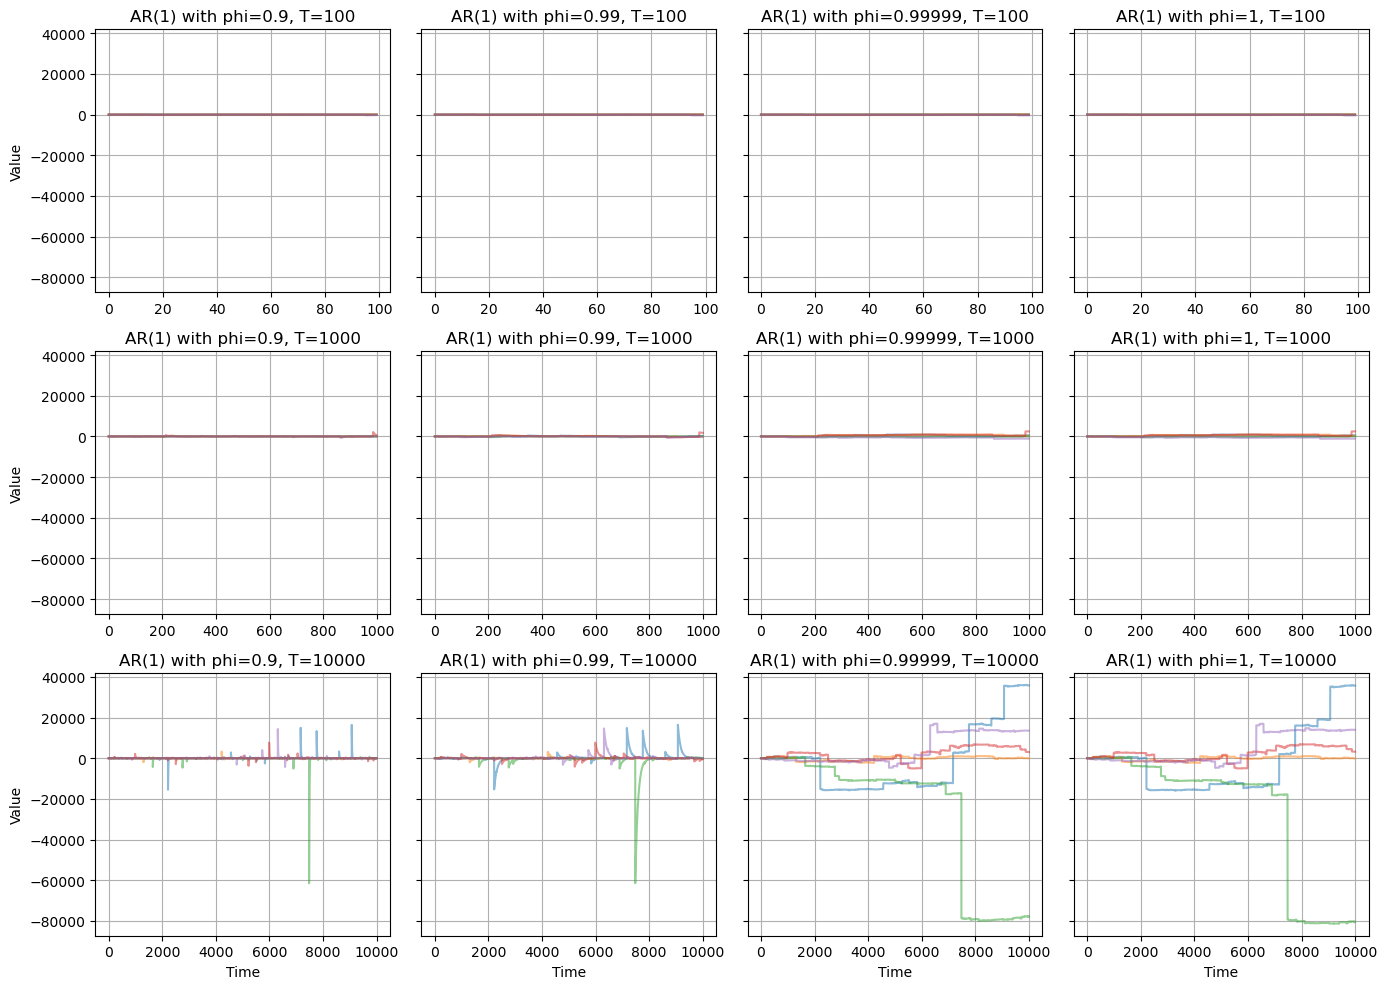

In [4]:
phis = [0.9, 0.99, 0.99999, 1]
sample_sizes = [100, 1000,10000]
def simulate_ar1(phi, T,et):
    xt = np.zeros(T)
    for t in range(1, T):
        xt[t] = phi * xt[t-1] + et[t]
    return xt
sample_path=5
cauchy_et = np.random.standard_cauchy(size=(sample_sizes[-1],sample_path)) 
mean_res=np.ones((len(sample_sizes),len(phis),sample_path))
std_res=np.ones((len(sample_sizes),len(phis),sample_path))
population_mean=pd.DataFrame(index=sample_sizes,columns=phis)
population_std=pd.DataFrame(index=sample_sizes,columns=phis)
fig, axs = plt.subplots(len(sample_sizes),len(phis),figsize=(14, 10), sharey=True)
for i, T in enumerate(sample_sizes):
    for j, phi in enumerate(phis):
        x_all=[]
        for temp in range(sample_path):
            xt = simulate_ar1(phi, T,cauchy_et[:,temp])
            x_all.append(xt)
            axs[i, j].plot(xt,alpha=0.5,label=f'Sample {temp+1}')
            mean_res[i,j,temp]=np.mean(xt)
            std_res[i,j,temp]=np.std(xt)
        axs[i, j].set_title(f'AR(1) with phi={phi}, T={T}')
        axs[i, j].grid(True)   
        population_mean.loc[T,phi]=np.mean(x_all)
        population_std.loc[T,phi]=np.std(x_all)
        if i == len(sample_sizes) - 1:
            axs[i, j].set_xlabel('Time')
        if j == 0:
            axs[i, j].set_ylabel('Value')
plt.tight_layout()
plt.show()


In [5]:
for i, T in enumerate(sample_sizes):
    for j, phi in enumerate(phis):
        print(f'The mean of the sample path with T={T} and phi={phi} is {mean_res[i,j,:]} and the std is {std_res[i,j,:]}')
        print('\n')

The mean of the sample path with T=100 and phi=0.9 is [ -1.14578356   5.49512115   3.88748375  -2.78188231 -18.91867944] and the std is [ 5.51648008 17.22460229  7.81034231 30.54165758 57.62129015]


The mean of the sample path with T=100 and phi=0.99 is [ -2.9000757   37.0644387   24.49219896 -38.78323955 -41.26973108] and the std is [ 7.25193215 23.8978187   9.36711693 47.63656457 72.90114189]


The mean of the sample path with T=100 and phi=0.99999 is [ -3.18331181  58.32797361  36.48921518 -64.79173392 -50.03727159] and the std is [ 7.74585664 22.51335412 12.4883143  44.36474921 79.42199365]


The mean of the sample path with T=100 and phi=1 is [ -3.18346319  58.35623924  36.50486999 -64.82638062 -50.04787712] and the std is [ 7.74640335 22.51482125 12.49528914 44.36077301 79.43051982]


The mean of the sample path with T=1000 and phi=0.9 is [  5.16254935   3.13432306   0.09442759  19.6852017  -11.07760784] and the std is [ 55.67011694  58.07282075  36.67087478 164.36073072  64.901

#### In threory:
1) Given sample size, the closer the phi is to 1, the more volatile the mean and the standard deviation is.  
2) Given phi, the larger the sample size is, the more stable the mean and the standard deviation is.  

#### However, in Cauchy distribution, both mean and variance are undefined.
What if $e_t$ follows Cauchy distribution?

Extreme Observations: The AR(1) process would likely exhibit more extreme observations (spikes or drops) that could persist over time due to the autoregressive nature of the process. This can make the time series appear more volatile.

Undefined Mean and Variance: The Cauchy distribution does not have a defined mean or variance. As a result, the AR(1) process would not stabilize around a long-run mean, and the sample paths would not converge to a steady state. This makes statistical analysis of the mean and variance of the process problematic.

Implications for Forecasting: The presence of heavy-tailed noise makes forecasting more challenging, as the predictive intervals would need to account for the potential of extreme values.

Potential Non-stationarity: Although an AR(1) process with $|\phi|<1$ is typically stationary, the heavy tails of the Cauchy distribution can lead to properties that resemble non-stationarity, where shocks have long-lasting effects on the future values of the process.


#### Q8

In [7]:

symbol = 'MULTPL/SP500_DIV_YIELD_MONTH'

df = np.log(web.DataReader(symbol, 'quandl', 
                               start='1881-01-01', 
                               end='2024-03-24', 
                               api_key='E47J_w_Tb6FmFjUZTRn6').iloc[::-1])


In [12]:
def cal_acf(x, nlags):
    x = np.array(x)
    mean_x = np.mean(x)
    length_x = x.shape[0]
    c_0 = np.sum((x-mean_x) **2)/(length_x-1)
    ans=[]
    for k in range(1,nlags+1):
        c_k = np.sum((x[:-k] - np.mean(x[:-k])) * (x[k:] - np.mean(x[k:])))/ (length_x-k)
        r_k = c_k / c_0
        ans.append(r_k)
    ans=[1]+ans
    return ans
def ljung_box_test(time_series, max_lag):
    n = len(time_series)
    Q = 0
    ac=cal_acf(time_series, max_lag)
    for lag in range(1, max_lag + 1):
        Q += (n*(n+2) * ac[lag]**2) / (n-lag)
    p_value = 1 - chi2.cdf(Q, nlags)
    return round(Q,3),round(p_value,3)

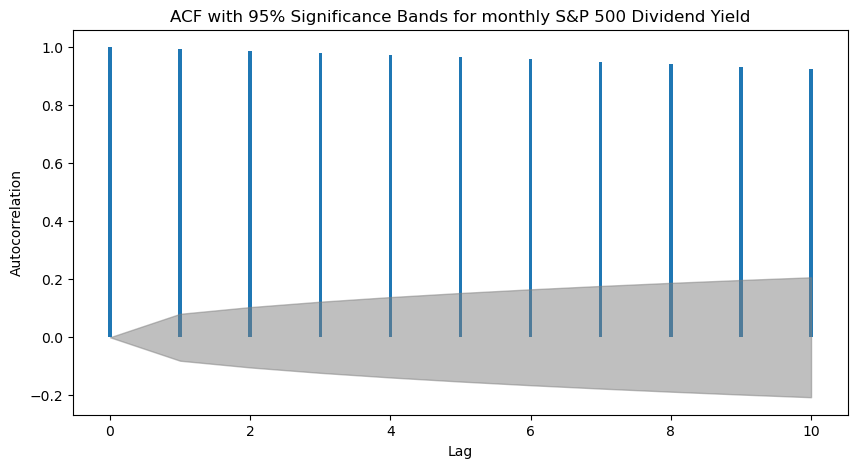

Ljung-Box test statistic for lag up to 10: 16244.756
P-value: 0.0


In [13]:

nlags = 10
acf_values = cal_acf(df, nlags)
acf_res=np.array(cal_acf(df,nlags=10))
sig_band=[]
for i in range(1,nlags+1):
    sig_band.append(1.96*np.sqrt((1+2*np.sum(acf_res[1:i+1]**2))/len(df)))
plt.figure(figsize=(10, 5))
plt.bar(range(nlags+1), acf_values, width=0.05)
sig_band_upper = [0] + sig_band
sig_band_lower = [-sb for sb in sig_band_upper]
plt.fill_between(range(nlags+1), sig_band_upper, sig_band_lower, color='grey', alpha=0.5)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF with 95% Significance Bands for monthly S&P 500 Dividend Yield')
plt.show()

max_lag = 10
Q_stat,p_value = ljung_box_test(df, max_lag)
print(f"Ljung-Box test statistic for lag up to {max_lag}: {Q_stat}")
print(f"P-value: {p_value}")



In [14]:
symbol='MULTPL/SP500_DIV_YIELD_YEAR'
df = np.log(web.DataReader(symbol, 'quandl', 
                               start='1881-01-01', 
                               end='2024-03-24', 
                               api_key='E47J_w_Tb6FmFjUZTRn6').iloc[::-1])

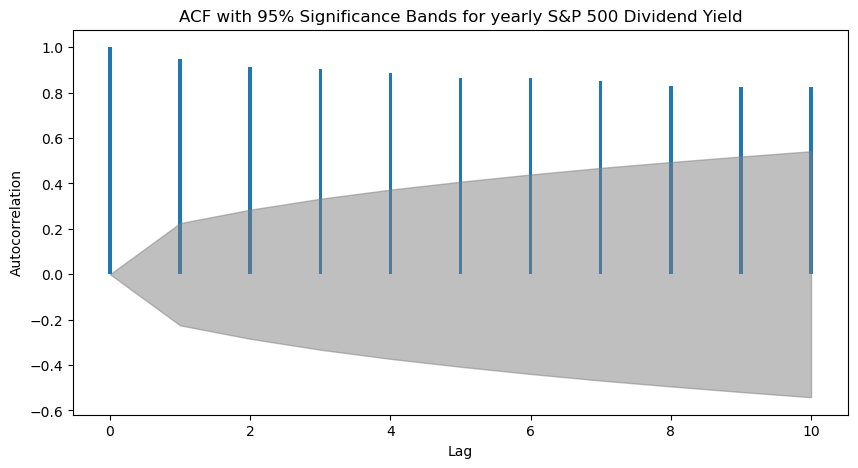

Ljung-Box test statistic for lag up to 10: 1667.886
P-value: 0.0


In [15]:

import matplotlib.pyplot as plt
nlags = 10
acf_values = cal_acf(df, nlags)
acf_res=np.array(cal_acf(df,nlags=10))
sig_band=[]
for i in range(1,nlags+1):
    sig_band.append(1.96*np.sqrt((1+2*np.sum(acf_res[1:i+1]**2))/len(df)))
plt.figure(figsize=(10, 5))
plt.bar(range(nlags+1), acf_values, width=0.05)
sig_band_upper = [0] + sig_band
sig_band_lower = [-sb for sb in sig_band_upper]
plt.fill_between(range(nlags+1), sig_band_upper, sig_band_lower, color='grey', alpha=0.5)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF with 95% Significance Bands for yearly S&P 500 Dividend Yield')
plt.show()
max_lag = 10
Q_stat,p_value = ljung_box_test(df, max_lag)
print(f"Ljung-Box test statistic for lag up to {max_lag}: {Q_stat}")
print(f"P-value: {p_value}")

#### Monthly Dividend Yield ACF:
There is a strong positive autocorrelation that gradually decreases as the lags increase. This indicates a persistent pattern where past values have a significant positive influence on future values in the monthly series.

#### Yearly Dividend Yield ACF:

1.Similar to the monthly ACF, the yearly ACF also exhibits a gradual decrease in autocorrelation as the lags increase.<br>
2.The yearly autocorrelation seems to fall between the confidence interval quickly than that in month (in terms of lags only not the real time)